This notebook is an implementation of the data structure trie in python. Tries are useful data structure when used with words that have similar prefixes. They are more space efficient than hash's but are slower as hash's should be O(1), while tries are O(N) where N is the length of the string that is being searched for.

In [1]:
from graphviz import Digraph

dot = Digraph()

In [5]:
dot.node('1')
b = '4'
dot.node(b)
c = dot.node('3')

dot.edges(['1'+b])
dot.edges(['13'])

In [26]:
a = [1,2,3]
a[-1]

3

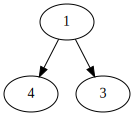

In [6]:
dot

In [1]:
from graphviz import Digraph

In [46]:
class TrieNode:
    def __init__(self, label='', children=None):
        self.children = []
        self.label = label
        
#     def __eq__(self, other):
#         if self.label == other.label:
#             return 1
#         else: return 0
    
    def add_word(self, word):
#         word_node = []
#         for char in word:
#             word_node += [TrieNode(char)]
        word_node = self.make_trienode(word)
        self.children += [word_node]
        
        return self
    
    def search_word(self, word):
        word_node = self.make_trienode(word)

        def search_me(self, word):
            if word.label == '*': return True
            
            for c in self.children:
                print('children:', c.label)
                if c.label == word.label:
                    return search_me(c, word.children[0]) #self.children needs to be a list of lists
            return False
        
        return search_me(self, word_node)
    
    def make_trienode(self, word):
        word_node = []
        for char in word:
            word_node += [TrieNode(char)]
            
            
        for i in range(len(word_node)-1):
            word_node[i].children += [word_node[i+1]]
        word_node[-1].children += [TrieNode('*')]
        
        return word_node[0]
    
    def visualize(tree):     
        def visualize_me(tree, dot=None):
            
            if dot is None:
                dot = Digraph()
                dot.node(name=str(tree), label = tree.label)
            
            if tree.children:
                for c in tree.children:
                    dot.node(name=str(c), label = c.label)
                    dot.edge(str(tree), str(c))
                    dot = visualize_me(c, dot)
            
            return dot
        
        dot = visualize_me(tree)
        display(dot)
        
        
        return dot

In [48]:
t = TrieNode('*')
t.add_word('hello')
t.add_word('jam')
# t.search_word('hey')
s = t.search_word('ham')
print(s)

children: h
children: e
False


in


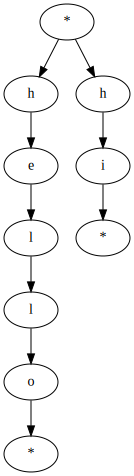

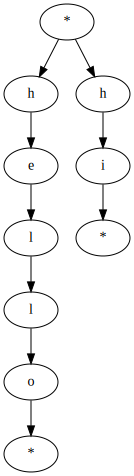

In [58]:
t = TrieNode('*')
t.add_word('hello')
tree = t.add_word('hi')

tree.visualize()
# print(tree.children[0].children[0].children[0].children[0].children[0].label)

In [86]:
class TrieNode:
    def __init__(self):
        self.head = {}
        self.head['head'] = {}
    
    def add(self, word):
        cur = self.head['head']
        for char in word:
            if char not in cur:
                cur[char] = {}
            cur = cur[char]
        cur['*'] = True
        
#     def __repr__(self):
#         return str(self.head.items())

    def visualize(self):
        trie_dict = self.head['head'].items()
        dot = Digraph()
        root = 'm'
        dot.node(root)
        
        def visualize_me(dot, trie_dict,prev):
            print(trie_dict)
            for k,v in trie_dict:
                print(k)
                dot.node(k)
                dot.edges([prev+k])
    
                if isinstance(v, dict):
                    visualize_me(dot, v.items(), k)
                
            return dot
        
        dot = visualize_me(dot, trie_dict, prev = root)
        display(dot)
        return dot

In [87]:
a = TrieNode()
a.add('hi')
a.add('hello')
a.add('bye')
print(a)

dict_items([('h', {'i': {'*': True}, 'e': {'l': {'l': {'o': {'*': True}}}}}), ('b', {'y': {'e': {'*': True}}})])
h
dict_items([('i', {'*': True}), ('e', {'l': {'l': {'o': {'*': True}}}})])
i
dict_items([('*', True)])
*
e
dict_items([('l', {'l': {'o': {'*': True}}})])
l
dict_items([('l', {'o': {'*': True}})])
l
dict_items([('o', {'*': True})])
o
dict_items([('*', True)])
*
b
dict_items([('y', {'e': {'*': True}})])
y
dict_items([('e', {'*': True})])
e
dict_items([('*', True)])
*


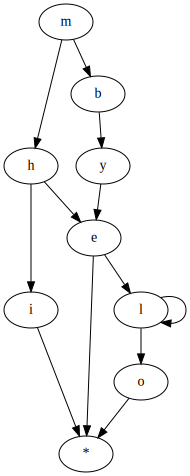

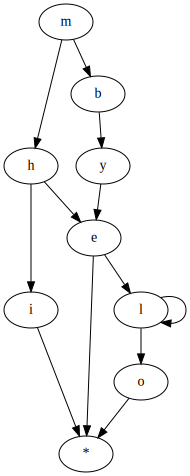

In [88]:
a.visualize()

In [49]:
a = {}
a['f'] = 2
a['b'] = 4
a
for k,v in a.items():
    print(k,v)

f 2
b 4


In [21]:
dot = Digraph()
dot.node('1')
dot.node('2')
dot.node('3')

dot.edges(['12'])
dot.edges(['13'])

NameError: name 'Digraph' is not defined

In [89]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        

class Solution(object):
    def mergeTrees(self, t1, t2):
        """
        :type t1: TreeNode
        :type t2: TreeNode
        :rtype: TreeNode
        """
        
        if t1 and t2:
            # Merge the values from two trees
            node = TreeNode(t1.val + t2.val)
            
            # Merge the left trees using the function recursively
            node.left = self.mergeTrees(t1.left, t2.left)
            
            # Merge the right trees using the function recursively
            node.right = self.mergeTrees(t1.right, t2.right)
            
            return node
            
        else:
            return t1 or t2
        

In [93]:
t1 = TreeNode(1)
t1.left = TreeNode(3)
t1.left.left = TreeNode(5)
t1.right = TreeNode(2)

t2 = TreeNode(2)
t2.left = TreeNode(1)
t2.left.right = TreeNode(4)
t2.right = TreeNode(3)
t2.right.right = TreeNode(7)

s = Solution()
merged_tree = s.mergeTrees(t1, t2)

In [91]:
def visualize_tree(tree):
    def add_nodes_edges(tree, dot=None):
        # Create Digraph object
        if dot is None:
            dot = Digraph()
            dot.node(name=str(tree), label=str(tree.val))

        # Add nodes
        if tree.left:
            dot.node(name=str(tree.left) ,label=str(tree.left.val))
            dot.edge(str(tree), str(tree.left))
            dot = add_nodes_edges(tree.left, dot=dot)
            
        if tree.right:
            dot.node(name=str(tree.right) ,label=str(tree.right.val))
            dot.edge(str(tree), str(tree.right))
            dot = add_nodes_edges(tree.right, dot=dot)

        return dot
    
    # Add nodes recursively and create a list of edges
    dot = add_nodes_edges(tree)

    # Visualize the graph
    display(dot)
    
    return dot
    

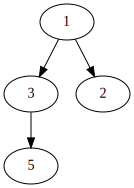

In [92]:
dot = visualize_tree(t1)

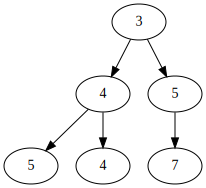

In [94]:
dot = visualize_tree(merged_tree)